<a href="https://colab.research.google.com/github/DurdenTyler2008/University-of-AI/blob/main/2_2_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%B3%D0%B5%D0%BD%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B_lite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Решите задачу расстановки грузов по поездам в усложнённом варианте, добейтесь полного распределения грузов по поездам:
А. Поезда: 1, 12, 72, 4, 55, 1

Б. Грузы: 1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8

2.Решите задачу расстановки грузов по поездам с дополнительным условием: нужно заполнить поезда максимально равномерно, но можно не полностью, грузов будет не для полного заполнения (для решения доработайте функцию оценки качества бота):
А. Поезда: 10, 10, 10, 12, 12, 12

Б. Грузы: 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6

In [28]:
import random as random
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors 


%matplotlib inline 

###Функции:

In [31]:
'''
    Функция получения выжившей популяции
        Входные параметры:
        - popul - наша популяция
        - val - текущие значения
        - nsurv - количество выживших
        - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
'''
def getSurvPopul(popul,val,nsurv,reverse):

    newpopul = []                                             # Двумерный массив для новой популяции
    sval = sorted(val, reverse=reverse)                       # Сортируем зачения в val в зависимости от параметра reverse    
    for i in range(nsurv):                                    # Проходимся по циклу nsurv-раз (в итоге в newpopul запишется nsurv-лучших показателей)
        index = val.index(sval[i])                            # Получаем индекс i-того элемента sval в исходном массиве val
        newpopul.append(popul[index])                         # В новую папуляцию добавляем элемент из текущей популяции с найденным индексом
    return newpopul, sval                                     # Возвращаем новую популяцию (из nsurv элементов) и сортированный список

'''
    Функция получения родителей
        Входные параметры:
        - curr_popul - текущая популяция
        - nsurv - количество выживших
'''
def getParents(curr_popul,nsurv): 

    indexp1 = random.randint(0, nsurv - 1)                      # Случайный индекс первого родителя в диапазоне от 0 до nsurv - 1
    indexp2 = random.randint(0, nsurv - 1)                      # Случайный индекс второго родителя в диапазоне от 0 до nsurv - 1    
    botp1 = curr_popul[indexp1]                                 # Получаем первого бота-родителя по indexp1
    botp2 = curr_popul[indexp2]                                 # Получаем второго бота-родителя по indexp2    
    return botp1, botp2                                         # Возвращаем обоих полученных ботов

'''
    Функция смешивания (кроссинговера) двух родителей
        Входные параметры:
        - botp1 - первый бот-родитель
        - botp2 - второй бот-родитель
        - j - номер компонента бота
'''
def crossPointFrom2Parents(botp1, botp2, j):

    pindex = random.random()                                    # Получаем случайное число в диапазоне от 0 до 1
    
    # Если pindex меньше 0.5, то берем значения от первого бота, иначе от второго
    if pindex < 0.5:
        x = botp1[j]
    else:
        x = botp2[j]
    return x 

### Задание №1:


In [ ]:
#train = np.array([11, 18, 6, 15, 9, 3, 2, 21]) # Вместимость каждого поезда
# Количество каждого груза (сумма грузов должна быть равна вместимости всех поездов (85=85))
#size = np.array([5, 6, 9, 5, 4, 3, 3, 5, 8, 2, 6, 3, 2, 1, 2, 20, 1]) 
train = np.array([1, 12, 72, 4, 55, 1])
size = np.array([1, 1, 1, 1, 4, 3, 3, 3, 1, 27, 31, 7, 7, 11, 22, 7, 7, 8])

print("Вместимость поездов:", train.sum())
print("Сумма грузов:", size.sum())

print("Кол-во поездов:", train.shape)
print("Кол-во грузов:", size.shape)

Вместимость поездов: 145
Сумма грузов: 145
Кол-во поездов: (6,)
Кол-во грузов: (18,)


0   166.66   [50, 56, 72, 88, 92, 98, 100, 104, 106, 108, 108, 112, 116, 120, 120, 120, 122, 124, 124, 128]
1   116.72   [18, 36, 38, 44, 50, 50, 50, 56, 56, 56, 60, 68, 70, 72, 72, 72, 78, 78, 80, 80]
2   98.28   [18, 22, 28, 36, 38, 40, 42, 44, 48, 48, 50, 50, 50, 54, 56, 56, 56, 58, 60, 60]
3   81.84   [18, 22, 24, 24, 28, 32, 36, 36, 36, 38, 38, 38, 38, 40, 40, 40, 42, 42, 42, 42]
4   84.66   [18, 20, 22, 24, 24, 28, 28, 32, 32, 36, 36, 36, 36, 38, 38, 38, 38, 38, 40, 40]
5   84.5   [18, 20, 20, 22, 24, 24, 24, 26, 26, 28, 28, 32, 32, 32, 32, 32, 32, 34, 36, 36]
6   76.04   [18, 18, 20, 20, 20, 20, 22, 24, 24, 24, 26, 26, 26, 28, 28, 28, 28, 32, 32, 32]
7   72.1   [16, 18, 18, 20, 20, 20, 20, 20, 20, 22, 24, 24, 24, 24, 26, 26, 26, 26, 28, 28]
8   71.78   [16, 18, 18, 20, 20, 20, 20, 20, 20, 22, 22, 24, 24, 24, 24, 26, 26, 26, 26, 26]
9   77.54   [16, 18, 18, 18, 20, 20, 20, 20, 20, 20, 22, 22, 24, 24, 24, 24, 24, 24, 26, 26]
10   65.9   [10, 12, 14, 16, 18, 18, 18, 20, 20, 20, 20,

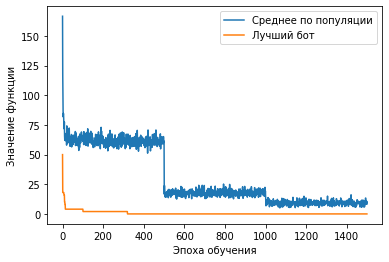

In [ ]:
n = 100                                     # Общее число ботов
nsurv = 20                                  # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv                              # Количество новых (столько новых ботов создается)
epohs = 1500                                # количество эпох
mut = 0.4                                   # коэфициент мутаций

# Длина бота(количество единиц груза) (Каждый компонент указывает индекс поезда, в котором этот груз будет размещен)
l = size.shape[0] 
trains = train.shape[0]                     # Количество поездов

popul = []                                  # Двумерный массив популяции, размерностью [n, l].
val = []                                    # Одномерный массив значений этих ботов

plotmeanval = []                            # сюда будут заносится значения для графика по среднему значению
plotminval = []                             # сюда будут заносится значения для графика по минимальному значению
 
for i in range(n):                          # Проходим по всей длине популяции
    popul.append([])                        # Создаем пустого бота
    for j in range(l):                      # Проходим по всей длине бота
        
        # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
        popul[i].append(random.randint(0, trains - 1)) 

for it in range(epohs):                     # Проходим по всем эпохам

    if it == 500:                         # Меняем коэфициент мутации после 500-ой эпохи
        mut = 0.1   
    if it == 1000:                        # Меняем коэфициет мутации после 1000-ой эпохи
        mut = 0.05  

    val = []                                # Создаем пустой список для значений ботов
    for i in range(n):                      # Проходим по всей популяции
        bot = popul[i]                      # Берем очередного бота
        trainfill = np.array([0, 0, 0, 0, 0, 0, 0, 0])            # Массив, хранящий заполняемость каждого поезда
        for j in range(l):                                        # Проходим по всей длине боta
            trainfill[bot[j]] += size[j]                          # Увеличиваем заполненность bot[j]-го поезда на size[j]          
        
        f = 0                                                     # Обнуляем ошибку i-го бота 
        for t in range(trains):                                   # Проходим по всем поездам
            # Увеличиваем ошибку i-го бота на модуль разницы между реальной вместимостью поезда 
            # и вместимостью, который посчитал бот
            f += abs(train[t] - trainfill[t]) 
        val.append(f)                                             # Добавляем в val значение ошибки для i-го бота    
    
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0)           # Получаем новую популяцию и сортированный список значнией
    print(it, " ", sum(val) / len(val), " ", sval[0:20])          # Выводим среднее значение и 20 лучших ботов  
    plotmeanval.append(sum(val) / len(val))                       # Добавляем среднее значение в список
    plotminval.append(sval[0])                                    # Добавляем минимальное значение в список
    
    for i in range(nnew):                                         # Проходимся в цикле nnew-раз
        botp1, botp2 = getParents(newpopul, nsurv)                # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = []                                               # Массив для нового бота
    
        for j in range(l):                                        # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j)           # Получаем значение для j-ого компонента бота
        
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x)                                      # Добавляем новое значение в бота      
        newpopul.append(newbot)                                   # Добавляем бота в новую популяцию    
    popul = newpopul                                              # Записываем в popul новую посчитанную популяцию

 
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [ ]:
for i in range(10):
    print(popul[i])

[5, 0, 2, 3, 2, 1, 4, 3, 1, 2, 4, 4, 4, 2, 2, 2, 4, 1]
[5, 0, 2, 3, 2, 1, 4, 3, 1, 2, 4, 4, 4, 2, 2, 2, 4, 1]
[5, 0, 2, 3, 2, 1, 4, 3, 1, 2, 4, 4, 4, 2, 2, 2, 4, 1]
[5, 0, 2, 3, 2, 1, 4, 3, 1, 2, 4, 4, 4, 2, 2, 2, 4, 1]
[5, 0, 2, 3, 2, 1, 4, 3, 1, 2, 4, 4, 4, 2, 2, 2, 4, 1]
[5, 0, 2, 3, 2, 1, 4, 3, 1, 2, 4, 4, 4, 2, 2, 2, 4, 1]
[5, 0, 2, 3, 2, 1, 4, 3, 1, 2, 4, 4, 4, 2, 2, 2, 4, 1]
[5, 0, 2, 3, 2, 1, 4, 3, 1, 2, 4, 4, 4, 2, 2, 2, 4, 1]
[5, 0, 2, 3, 2, 1, 4, 3, 1, 2, 4, 4, 4, 2, 2, 2, 4, 1]
[5, 0, 2, 3, 2, 1, 4, 3, 1, 2, 4, 4, 4, 2, 2, 2, 4, 1]


In [ ]:
bot = popul[0]                                    # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot)             # Выводим значения бота (каждый параметр хранит номер поезда, в который следует разместить груз)

trainfill = np.zeros(trains, dtype = 'int32')     # Массив заполненности поездов
for j in range(l):                                # Проходим по всей длине бота
    trainfill[bot[j]] += size[j]                  # Увеличиваем заполненность bot[j]-ого поезда на size[j]

print ('Вместимость поездов по боту:', trainfill) # Выводим заполненность поездов в соответствии с ботом
print ('Реальная вместимость поездов:', train)    # Выводим реальную вместимость поездов

Значения лучшего бота: [5, 0, 2, 3, 2, 1, 4, 3, 1, 2, 4, 4, 4, 2, 2, 2, 4, 1]
Вместимость поездов по боту: [ 1 12 72  4 55  1]
Реальная вместимость поездов: [ 1 12 72  4 55  1]


In [ ]:
# грузы распределены полностью

In [ ]:
#------------------------------------------------------------------------------------------

###Задание №2:

###Решение №1- искусственно уменьшаю вместимость каждого поезда на 20%

In [32]:
train = np.array([10, 10, 10, 12, 12, 12])
size = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6])

print("Вместимость поездов:", train.sum())
print("Сумма грузов:", size.sum())

print("Кол-во поездов:", train.shape)
print("Кол-во грузов:", size.shape)

Вместимость поездов: 66
Сумма грузов: 54
Кол-во поездов: (6,)
Кол-во грузов: (18,)


In [46]:
train_reduce = []
for i in range(len(train)):
    train_reduce.append(int(train[i]*0.8))

In [47]:
train_reduce  # это новая вместимость поездов, такое решение показало лучший результат, чем: f += abs(train[t]*0.8 - trainfill[t]) 

[8, 8, 8, 9, 9, 9]

0 : 26.8   [9, 13, 13, 13, 13, 15, 15, 15, 15, 17, 17, 17, 19, 19, 19, 19, 19, 19, 19, 19]
1 : 22.4   [9, 13, 13, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17]
2 : 22.98   [5, 9, 9, 11, 11, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15]
3 : 20.68   [5, 9, 9, 11, 11, 11, 11, 11, 11, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
4 : 20.06   [5, 7, 7, 9, 9, 9, 9, 9, 11, 11, 11, 11, 11, 11, 11, 13, 13, 13, 13, 13]
5 : 20.76   [5, 7, 7, 7, 7, 9, 9, 9, 9, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
6 : 20.3   [5, 5, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 11, 11, 11, 11, 11, 11, 11, 11]
7 : 20.3   [5, 5, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 11, 11, 11, 11, 11, 11, 11, 11]
8 : 20.78   [5, 5, 5, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 11, 11, 11, 11, 11]
9 : 20.38   [5, 5, 5, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 11, 11, 11]
10 : 19.56   [5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
11 : 19.68   [5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9]
12 : 19.

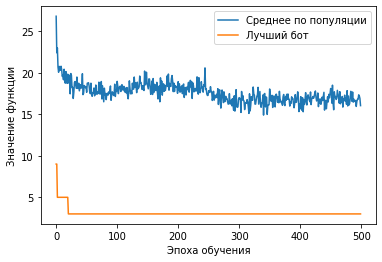

In [48]:
n = 100                                     # Общее число ботов
nsurv = 20                                  # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv                              # Количество новых (столько новых ботов создается)
epohs = 500                               # количество эпох
mut = 0.4                                   # коэфициент мутаций

# Длина бота(количество единиц груза) (Каждый компонент указывает индекс поезда, в котором этот груз будет размещен)
l = size.shape[0] 
trains = train.shape[0]                     # Количество поездов

popul = []                                  # Двумерный массив популяции, размерностью [n, l].
val = []                                    # Одномерный массив значений этих ботов

plotmeanval = []                            # сюда будут заносится значения для графика по среднему значению
plotminval = []                             # сюда будут заносится значения для графика по минимальному значению
 
for i in range(n):                          # Проходим по всей длине популяции
    popul.append([])                        # Создаем пустого бота
    for j in range(l):                      # Проходим по всей длине бота
        
        # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
        popul[i].append(random.randint(0, trains - 1)) 

for it in range(epohs):                     # Проходим по всем эпохам

    if it == 500:                         # Меняем коэфициент мутации после 500-ой эпохи
        mut = 0.1   
    if it == 1000:                        # Меняем коэфициет мутации после 1000-ой эпохи
        mut = 0.05  

    val = []                                                      # Создаем пустой список для значений ботов
    for i in range(n):                                            # Проходим по всей популяции
        bot = popul[i]                                            # Берем очередного бота
        trainfill = np.array([0, 0, 0, 0, 0, 0, 0, 0])            # Массив, хранящий заполняемость каждого поезда
        for j in range(l):                                        # Проходим по всей длине бот
            trainfill[bot[j]] += size[j]                          # Увеличиваем заполненность bot[j]-го поезда на size[j]        
        
        f = 0                                                     # Обнуляем ошибку i-го бота 
        for t in range(trains):                                   # Проходим по всем поездам
            # Увеличиваем ошибку i-го бота на модуль разницы между реальной вместимостью поезда 
            # и вместимостью, который посчитал бот
            #f += abs(train[t]*0.8 - trainfill[t]) 
            f += abs(train_reduce[t] - trainfill[t])
        val.append(f)                                             # Добавляем в val значение ошибки для i-го бота    
    
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0)           # Получаем новую популяцию и сортированный список значнией
    
    #print(sum(val) /  len(val))
    
    print(it, ":", sum(val) / len(val), " ", sval[0:20])          # Выводим среднее значение и 20 лучших ботов  
    plotmeanval.append(sum(val) / len(val))                       # Добавляем среднее значение в список
    plotminval.append(sval[0])                                    # Добавляем минимальное значение в список
    
    for i in range(nnew):                                         # Проходимся в цикле nnew-раз
        botp1, botp2 = getParents(newpopul, nsurv)                # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = []                                               # Массив для нового бота
    
        for j in range(l):                                        # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j)           # Получаем значение для j-ого компонента бота
        
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x)                                      # Добавляем новое значение в бота      
        newpopul.append(newbot)                                   # Добавляем бота в новую популяцию    
    popul = newpopul                                              # Записываем в popul новую посчитанную популяцию

 
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [49]:
for i in range(10):
    print(popul[i])
    print(sum(popul[i]))

[2, 1, 1, 4, 2, 4, 4, 2, 1, 2, 0, 3, 5, 1, 0, 4, 5, 3]
44
[2, 1, 1, 4, 2, 4, 4, 2, 1, 2, 0, 3, 5, 1, 0, 4, 5, 3]
44
[2, 1, 1, 4, 2, 4, 4, 2, 1, 2, 0, 3, 5, 1, 0, 4, 5, 3]
44
[2, 1, 1, 4, 2, 4, 4, 2, 1, 2, 0, 3, 5, 1, 0, 4, 5, 3]
44
[2, 1, 1, 4, 2, 4, 4, 2, 1, 2, 0, 3, 5, 1, 0, 4, 5, 3]
44
[2, 1, 1, 4, 2, 4, 4, 2, 1, 2, 0, 3, 5, 1, 0, 4, 5, 3]
44
[2, 1, 1, 4, 2, 4, 4, 2, 1, 2, 0, 3, 5, 1, 0, 4, 5, 3]
44
[2, 1, 1, 4, 2, 4, 4, 2, 1, 2, 0, 3, 5, 1, 0, 4, 5, 3]
44
[2, 1, 1, 4, 2, 4, 4, 2, 1, 2, 0, 3, 5, 1, 0, 4, 5, 3]
44
[2, 1, 1, 4, 2, 4, 4, 2, 1, 2, 0, 3, 5, 1, 0, 4, 5, 3]
44


In [52]:
bot = popul[0]                                    # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot)             # Выводим значения бота (каждый параметр хранит номер поезда, в который следует разместить груз)

trainfill = np.zeros(trains, dtype = 'int32')     # Массив заполненности поездов
for j in range(l):                                # Проходим по всей длине бота
    trainfill[bot[j]] =trainfill[bot[j]] + size[j]                 # Увеличиваем заполненность bot[j]-ого поезда на size[j]

print ('Вместимость поездов(reduse) по боту:', trainfill) # Выводим заполненность поездов(reduse) в соответствии с ботом
print ('Реальная вместимость поездов:', train)    # Выводим реальную вместимость поездов

Значения лучшего бота: [3, 3, 4, 4, 5, 3, 2, 0, 1, 3, 4, 3, 5, 5, 1, 4, 2, 0]
Вместимость поездов(reduse) по боту: [ 8  8  8 10 10 10]
Реальная вместимость поездов: [10 10 10 12 12 12]


In [ ]:
# Это распределение грузов при полной загрузке (без уменьшения иx емкости)
Значения лучшего бота: [1, 0, 2, 4, 1, 5, 1, 1, 2, 5, 1, 0, 2, 3, 4, 3, 5, 0]
Вместимость поездов по боту: [10 10  8  9  6 11]
Реальная вместимость поездов: [10 10 10 12 12 12]

In [ ]:
#_______________________________________________________________________________________

###Решение №2 - внести коэффициент в среднее (sum(val) / len(val)) * k

0 : 14.03   [12, 14, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20]
1 : 12.54   [12, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 18, 18, 18, 18, 18]
2 : 12.23   [12, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
3 : 11.92   [12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
4 : 12.25   [12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 16, 16, 16, 16]
5 : 11.89   [12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
6 : 11.39   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14]
7 : 10.87   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14]
8 : 11.28   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 14, 14]
9 : 10.89   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14]
10 : 10.46   [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 

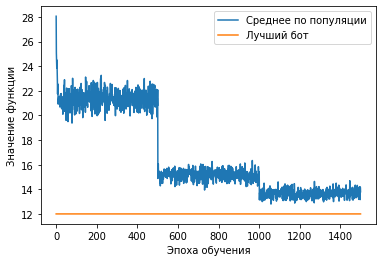

In [77]:
n = 100                                     # Общее число ботов
nsurv = 20                                  # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv                              # Количество новых (столько новых ботов создается)
epohs = 1500                               # количество эпох
mut = 0.4                                   # коэфициент мутаций
k = 0.5

# Длина бота(количество единиц груза) (Каждый компонент указывает индекс поезда, в котором этот груз будет размещен)
l = size.shape[0] 
trains = train.shape[0]                     # Количество поездов

popul = []                                  # Двумерный массив популяции, размерностью [n, l].
val = []                                    # Одномерный массив значений этих ботов

plotmeanval = []                            # сюда будут заносится значения для графика по среднему значению
plotminval = []                             # сюда будут заносится значения для графика по минимальному значению
 
for i in range(n):                          # Проходим по всей длине популяции
    popul.append([])                        # Создаем пустого бота
    for j in range(l):                      # Проходим по всей длине бота
        
        # В каждый компонент бота записываем рандомное значение в диапазоне от 0 до количества поездов
        popul[i].append(random.randint(0, trains - 1)) 

for it in range(epohs):                     # Проходим по всем эпохам

    if it == 500:                         # Меняем коэфициент мутации после 500-ой эпохи
        mut = 0.1   
    if it == 1000:                        # Меняем коэфициет мутации после 1000-ой эпохи
        mut = 0.05  

    val = []                                                      # Создаем пустой список для значений ботов
    for i in range(n):                                            # Проходим по всей популяции
        bot = popul[i]                                            # Берем очередного бота
        trainfill = np.array([0, 0, 0, 0, 0, 0, 0, 0])            # Массив, хранящий заполняемость каждого поезда
        for j in range(l):                                        # Проходим по всей длине бот
            trainfill[bot[j]] += size[j]                          # Увеличиваем заполненность bot[j]-го поезда на size[j]        
        
        f = 0                                                     # Обнуляем ошибку i-го бота 
        for t in range(trains):                                   # Проходим по всем поездам
            # Увеличиваем ошибку i-го бота на модуль разницы между реальной вместимостью поезда 
            # и вместимостью, который посчитал бот
            f += abs(train[t] - trainfill[t]) 
            
        val.append(f)                                             # Добавляем в val значение ошибки для i-го бота    
    
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0)           # Получаем новую популяцию и сортированный список значнией
    
    #exp = []
    #exp.append(sum(val) /  len(val))
    #print(exp)
    #print(sum(val))
    
    print(it, ":", (sum(val) / len(val)) * k, " ", sval[0:20])          # Выводим среднее значение и 20 лучших ботов  
    plotmeanval.append(sum(val) / len(val))                       # Добавляем среднее значение в список
    plotminval.append(sval[0])                                    # Добавляем минимальное значение в список
    
    for i in range(nnew):                                         # Проходимся в цикле nnew-раз
        botp1, botp2 = getParents(newpopul, nsurv)                # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        newbot = []                                               # Массив для нового бота
    
        for j in range(l):                                        # Проходим по всей длине бота
            x = crossPointFrom2Parents(botp1, botp2, j)           # Получаем значение для j-ого компонента бота
        
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            newbot.append(x)                                      # Добавляем новое значение в бота      
        newpopul.append(newbot)                                   # Добавляем бота в новую популяцию    
    popul = newpopul                                              # Записываем в popul новую посчитанную популяцию

 
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

In [76]:
bot = popul[0]                                    # Берем лучшее значение в популяции
print ('Значения лучшего бота:', bot)             # Выводим значения бота (каждый параметр хранит номер поезда, в который следует разместить груз)

trainfill = np.zeros(trains, dtype = 'int32')     # Массив заполненности поездов
for j in range(l):                                # Проходим по всей длине бота
    trainfill[bot[j]] =trainfill[bot[j]] + size[j]                 # Увеличиваем заполненность bot[j]-ого поезда на size[j]

print ('Вместимость поездов по боту:', trainfill) # Выводим заполненность поездов(reduse) в соответствии с ботом
print ('Реальная вместимость поездов:', train)    # Выводим реальную вместимость поездов

Значения лучшего бота: [0, 4, 3, 1, 2, 1, 2, 3, 4, 0, 5, 5, 2, 3, 5, 1, 4, 0]
Вместимость поездов по боту: [10  8  8  7 10 11]
Реальная вместимость поездов: [10 10 10 12 12 12]


In [ ]:
'''
среднее*0,1(sum(val) / len(val))*0.1
Значения лучшего бота: [0, 5, 0, 5, 0, 2, 1, 3, 5, 2, 1, 3, 3, 4, 5, 2, 0, 4]
Вместимость поездов по  боту: [10  5 10  9 10 10]
Реальная вместимость поездов: [10 10 10 12 12 12]
-------------------------------------------------
среднее*0,4(sum(val) / len(val))*0.4)
Значения лучшего бота: [5, 3, 2, 2, 2, 1, 5, 2, 1, 2, 3, 1, 4, 5, 0, 0, 4, 3]
Вместимость поездов  по боту: [10  8  9 10 10  7]
Реальная вместимость поездов: [10 10 10 12 12 12]
-------------------------------------------------
среднее*0,5(sum(val) / len(val))*0.5)
Значения лучшего бота: [0, 4, 3, 1, 2, 1, 2, 3, 4, 0, 5, 5, 2, 3, 5, 1, 4, 0]
Вместимость поездов по боту:  [10  8  8  7 10 11]
Реальная вместимость поездов: [10 10 10 12 12 12]
-------------------------------------------------
среднее*0,6(sum(val) / len(val))*0.6)
Значения лучшего бота: [5, 3, 2, 2, 2, 1, 5, 2, 1, 2, 3, 1, 4, 5, 0, 0, 4, 3]
Вместимость поездов  по боту: [10  8  9 10 10  7]
Реальная вместимость поездов: [10 10 10 12 12 12]
------------------------------------------------
среднее*0.8 (sum(val) / len(val))*0.8)
Значения лучшего бота: [2, 0, 1, 0, 4, 0, 2, 5, 2, 3, 3, 2, 4, 1, 3, 4, 5, 0]
Вместимость поездов  по боту: [10  5  9 11 11  8]
Реальная вместимость поездов: [10 10 10 12 12 12]

'''

In [ ]:
# самое равномерное распределение показала корректировка среднего на 0,6